## QUESTION 1:

###  Write a function  dft1()  that calculates the DFT of a 1D array of arbitrary size.

In [32]:
import numpy as np
import time
import matplotlib.pyplot as plt
import cv2

In [33]:
input_array_1D=np.array([1,2,3],dtype=complex)
input_array_2D= np.array([[1, 2, 3, 4],
                           [5, 6, 7, 8],
                           [9, 10, 11, 12],
                           [13, 14, 15, 16]],dtype=complex)

In [34]:
def dft1(x):
    N=len(x)
    n=np.arange(N)
    k=n.reshape((N,1))
    e=np.exp(-2j*np.pi*k*n/N)
    X=np.dot(e,x)
    return X

In [35]:
print(dft1(input_array_1D))

[ 6. +0.j        -1.5+0.8660254j -1.5-0.8660254j]


In [36]:
# TESTING PART FOR 1D DFT
testing_1D_DFT=np.fft.fft(input_array_1D)
print(testing_1D_DFT)

[ 6. +0.j        -1.5+0.8660254j -1.5-0.8660254j]


###  Write a function  dft2()  that computes the 2D-DFT of a 2D array, using  dft1()

In [37]:
# we will use the property of seperability of DFT to calculate 2D DFT

def dft2(x):
    result_rows=np.array([dft1(row) for row in x],dtype=complex)
    result_rows=result_rows.T
    result_cols=np.array([dft1(row) for row in result_rows],dtype=complex)
    result_cols=result_cols.T
    return result_cols.astype(complex)

In [38]:
result_2d=dft2(input_array_2D)
result_2d = np.round(result_2d, decimals=10)
print(result_2d)

[[136. +0.j  -8. +8.j  -8. -0.j  -8. -8.j]
 [-32.+32.j   0. -0.j   0. +0.j  -0. +0.j]
 [-32. -0.j   0. +0.j   0. +0.j  -0. +0.j]
 [-32.-32.j   0. +0.j  -0. +0.j  -0. +0.j]]


In [39]:
#Testing 2d dft with inbuilt function
testing_result_2d=np.fft.fft2(input_array_2D)
print(testing_result_2d)

[[136. +0.j  -8. +8.j  -8. +0.j  -8. -8.j]
 [-32.+32.j   0. +0.j   0. +0.j   0. +0.j]
 [-32. +0.j   0. +0.j   0. +0.j   0. +0.j]
 [-32.-32.j   0. +0.j   0. +0.j   0. +0.j]]


### Write a function  fft1()  that computes the DFT of a 1D array using the FFT algorithm.

In [40]:
# while it's not a power of 2 , keep appending zeroes.

def power2(data):
    while not np.log2(len(data)).is_integer():
        data = np.append(data, 0)
    return data


In [41]:
def FFT1D(data):
    n = len(data)

    if(n <= 1):
        return data.astype(complex)
    
    one_part = FFT1D(data[0::2])
    second_part = FFT1D(data[1::2])

    tiddle_factor = np.exp(-2j * np.pi / n)
    
    for p in range(len(second_part)):
        second_part[p]= (tiddle_factor**p) * second_part[p]
        
    addition = np.add(one_part,second_part)
    subtraction = np.subtract(one_part,second_part)
    FFT1D_result = np.concatenate([addition,subtraction])
    return FFT1D_result.astype(complex)

In [42]:
input_fft_1D=power2(input_array_1D)
result_fft_1D=FFT1D(input_fft_1D)
print(result_fft_1D)


[ 6.+0.j -2.-2.j  2.+0.j -2.+2.j]


In [43]:
# Testing 1D FFT
testing_input=[1,2,3,0]
testing_result_fft_1D=np.fft.fft(testing_input)
print(testing_result_fft_1D)

[ 6.+0.j -2.-2.j  2.+0.j -2.+2.j]


In [44]:
# funtction to pad 2d arrays
def pad2D_array(x):
    rows,cols=x.shape
    padded_rows=int(2**(np.ceil(np.log2(rows))))
    padded_cols=int(2**(np.ceil(np.log2(cols))))
    extra_zero_rows=padded_rows-rows
    extra_zero_cols=padded_cols-cols
    x=np.pad(x,((0,extra_zero_rows),(0,extra_zero_cols)),'constant')
    return x


testingpad2d=np.array([[1, 2, 4],
                           [9, 10, 12],
                           [13, 14,  16]])
print(pad2D_array(testingpad2d))


[[ 1  2  4  0]
 [ 9 10 12  0]
 [13 14 16  0]
 [ 0  0  0  0]]


In [45]:
def FFT2(x):  
    result_rows = np.array([FFT1D(row) for row in x])
    result_rows = result_rows.T
    result_columns = np.array([FFT1D(row) for row in result_rows])
    result_columns = result_columns.T
    return result_columns

In [46]:
# Example usage:
input_array_2d = np.array([[1, 2, 4],
                           [9, 10, 12],
                           [13, 14,  16]])
input_array_2d = pad2D_array(input_array_2d)
result_fft_2d = FFT2(input_array_2d)
print(result_fft_2d)


# testing purposes
print("testing result :")

result_testing_2d=np.fft.fft2(input_array_2d)
print(result_testing_2d)

[[ 81. +0.j  -9.-26.j  29. +0.j  -9.+26.j]
 [-36.-31.j -10.+15.j -12.-11.j  10. -9.j]
 [ 19. +0.j  -3. -6.j   7. +0.j  -3. +6.j]
 [-36.+31.j  10. +9.j -12.+11.j -10.-15.j]]
testing result :
[[ 81. +0.j  -9.-26.j  29. +0.j  -9.+26.j]
 [-36.-31.j -10.+15.j -12.-11.j  10. -9.j]
 [ 19. +0.j  -3. -6.j   7. +0.j  -3. +6.j]
 [-36.+31.j  10. +9.j -12.+11.j -10.-15.j]]


###  Compute the DFT of arrays of different lengths say [128, 256, 512, 1024] using  dft1() . Repeat the same using  fft1()  . Make a plot showing how the run-time changes with the array size, and comment on the differences observed in the two cases.


In [47]:
array_sizes = [128, 256, 512, 1024]
dft_runtimes = []
fft_runtimes = []
for size in array_sizes:
    x=np.random.rand(size)
    start_time = time.time()
    dft_runtime = dft1(x)
    end_time = time.time()
    dft_runtime = end_time - start_time
    start_time = time.time()
    fft_runtime = FFT1D(x)
    end_time = time.time()
    fft_runtime = end_time - start_time
    dft_runtimes.append(dft_runtime)
    fft_runtimes.append(fft_runtime)


Array Size: 128 | DFT Runtime: 0.001108 seconds | FFT Runtime: 0.000000 seconds
Array Size: 256 | DFT Runtime: 0.012048 seconds | FFT Runtime: 0.002924 seconds
Array Size: 512 | DFT Runtime: 0.024024 seconds | FFT Runtime: 0.008002 seconds
Array Size: 1024 | DFT Runtime: 0.107284 seconds | FFT Runtime: 0.016004 seconds


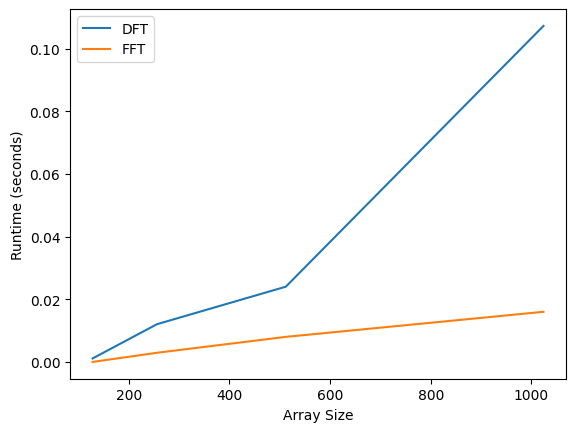

In [48]:
# Print the results : 
for size, dft_time, fft_time in zip(array_sizes, dft_runtimes, fft_runtimes):
    print(f"Array Size: {size} | DFT Runtime: {dft_time:.6f} seconds | FFT Runtime: {fft_time:.6f} seconds")

#Plot the results :
plt.plot(array_sizes, dft_runtimes, label="DFT")
plt.plot(array_sizes, fft_runtimes, label="FFT")
plt.xlabel("Array Size")
plt.ylabel("Runtime (seconds)")
plt.legend()
plt.show()




Run-time Comparison:

As the array size (N) increases, the run-time of the Fast Fourier Transform (FFT) using fft1() is significantly lower compared to the Discrete Fourier Transform (DFT) using dft1().
For larger N values (e.g., 512, 1024), the time difference between FFT and DFT becomes more pronounced.

Time Complexity:
The DFT algorithm, implemented in dft1(), has a time complexity of O(N^2), where N is the size of the input array. This is due to the nested loops in the DFT computation.
In contrast, the FFT algorithm, implemented in fft1(), has a more efficient time complexity of O(N log N). The divide-and-conquer strategy employed by FFT significantly reduces the overall computational complexity compared to the straightforward DFT approach

### Assuming the center pixel of the image as origin (0,0). Plot the 2D-DFTs of the images whose pixel intensities are :

#### a.  I = 0.5 * (  1 + sin(x) )

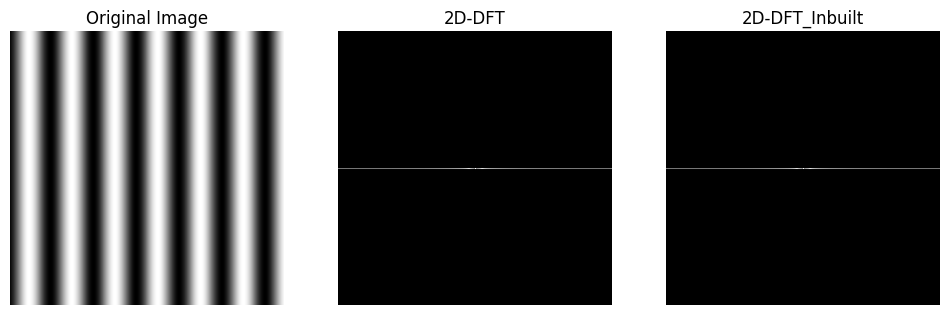

In [49]:
def intensity_function1(x):
    return 0.5*(1+np.sin(x))


x=np.linspace(-20,20,256)
y=np.linspace(-20,20,256)
x, y = np.meshgrid(x, y)
image = intensity_function1(x)
image=pad2D_array(image)


image_fft=FFT2(image)
image_fft_shifted = np.fft.fftshift(image_fft)
magnitude_spectrum = np.abs(image_fft_shifted)

image_fft_inbuilt=np.fft.fft2(image)
image_fft_inbuilt_shifted = np.fft.fftshift(image_fft_inbuilt)
magnitude_spectrum_inbuilt = np.abs(image_fft_inbuilt_shifted)

plt.figure(figsize=(12, 6))

plt.subplot(131)  # Use 131 for the first subplot
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)  # Use 132 for the second subplot
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('2D-DFT')
plt.axis('off')

plt.subplot(133)  # Use 133 for the third subplot
plt.imshow(np.log(1 + magnitude_spectrum_inbuilt), cmap='gray')
plt.title('2D-DFT_Inbuilt')
plt.axis('off')

plt.show()


### I = 0.5 *  ( 1 + sin(x) * sin(y) ) 

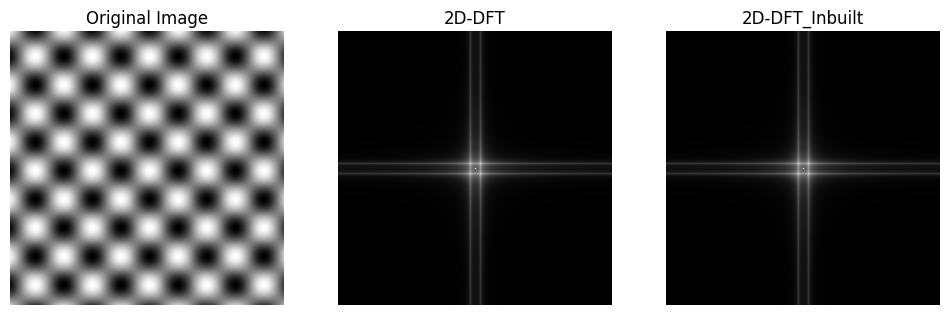

In [50]:
def intensity_function2(x,y):
    return 0.5*(1+(np.sin(x)*np.sin(y)))

x=np.linspace(-20,10,256)
y=np.linspace(-20,10,256)
x, y = np.meshgrid(x, y)
image = intensity_function2(x,y)
image=pad2D_array(image)


image_fft=FFT2(image)
image_fft_shifted = np.fft.fftshift(image_fft)
magnitude_spectrum = np.abs(image_fft_shifted)

image_fft_inbuilt=np.fft.fft2(image)
image_fft_inbuilt_shifted = np.fft.fftshift(image_fft_inbuilt)
magnitude_spectrum_inbuilt = np.abs(image_fft_inbuilt_shifted)

plt.figure(figsize=(12, 6))

plt.subplot(131)  # Use 131 for the first subplot
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)  # Use 132 for the second subplot
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('2D-DFT')
plt.axis('off')

plt.subplot(133)  # Use 133 for the third subplot
plt.imshow(np.log(1 + magnitude_spectrum_inbuilt), cmap='gray')
plt.title('2D-DFT_Inbuilt')
plt.axis('off')

plt.show()



###   I = 0.5 * (  1 + sin( x^2 + y^2 ) )

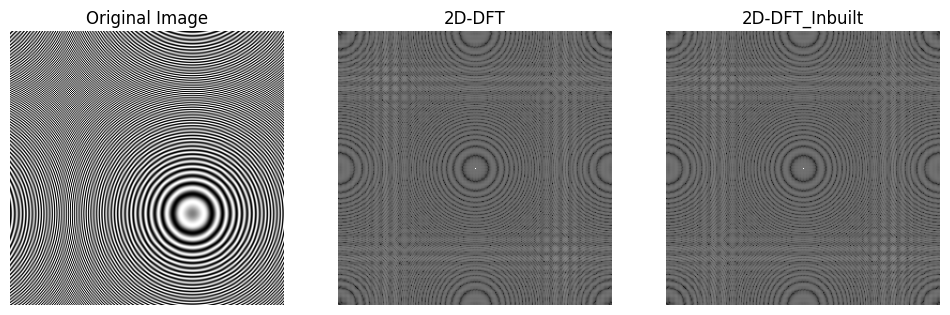

In [51]:
def intensity_function3(x,y):
    return 0.5 * (1 + np.sin(x**2 + y**2))

x=np.linspace(-20,10,256)
y=np.linspace(-20,10,256)
x, y = np.meshgrid(x, y)
image = intensity_function3(x,y)
image=pad2D_array(image)


image_fft=FFT2(image)
image_fft_shifted = np.fft.fftshift(image_fft)
magnitude_spectrum = np.abs(image_fft_shifted)

image_fft_inbuilt=np.fft.fft2(image)
image_fft_inbuilt_shifted = np.fft.fftshift(image_fft_inbuilt)
magnitude_spectrum_inbuilt = np.abs(image_fft_inbuilt_shifted)

plt.figure(figsize=(12, 6))

plt.subplot(131)  # Use 131 for the first subplot
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)  # Use 132 for the second subplot
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('2D-DFT')
plt.axis('off')

plt.subplot(133)  # Use 133 for the third subplot
plt.imshow(np.log(1 + magnitude_spectrum_inbuilt), cmap='gray')
plt.title('2D-DFT_Inbuilt')
plt.axis('off')

plt.show()




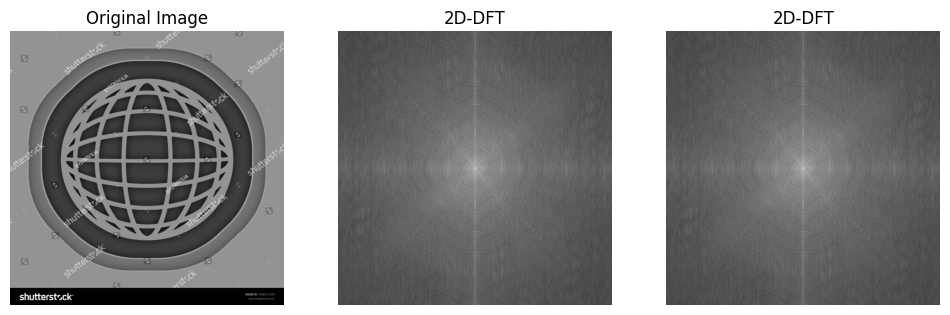

In [52]:
# take input of image IN GRAY SCALE
IMAGE1=cv2.imread('./1024_1024.jpg',cv2.IMREAD_GRAYSCALE)
# resize the image to 1024*1024
IMAGE1=cv2.resize(IMAGE1,(1024,1024))
PADDED_IMAGE1=IMAGE1


dft_image1=FFT2(PADDED_IMAGE1)
dft_image1_shifted = np.fft.fftshift(dft_image1)
magnitude_spectrum = np.log(1+ np.abs(dft_image1_shifted))


dft_image_inbuilt=np.fft.fft2(PADDED_IMAGE1)
dft_image_inbuilt_shifted = np.fft.fftshift(dft_image_inbuilt)
magnitude_spectrum_inbuilt = np.log(1+ np.abs(dft_image_inbuilt_shifted))


# Plotting
plt.figure(figsize=(12,6))

plt.subplot(131)
plt.imshow(IMAGE1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(magnitude_spectrum, cmap='gray')  # Log scale for better visualization
plt.title('2D-DFT')
plt.axis('off')

plt.subplot(133)
plt.imshow(magnitude_spectrum_inbuilt, cmap='gray')  # Log scale for better visualization
plt.title('2D-DFT')
plt.axis('off')


plt.show()


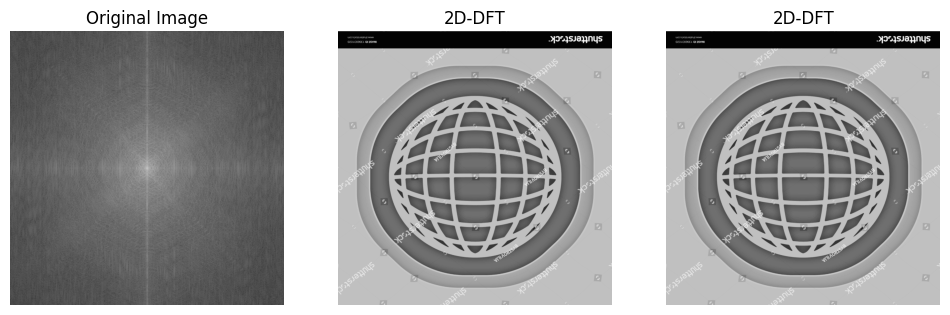

In [53]:
# take input of image IN GRAY SCALE
dft_result1=FFT2(dft_image1)
magnitude_spectrumm = np.log(1+ np.abs(dft_result1))


dft_image_inbuilt=np.fft.fft2(dft_image1)
magnitude_spectrum_inbuilt = np.log(1+ np.abs(dft_image_inbuilt))


# Plotting
plt.figure(figsize=(12,6))

plt.subplot(131)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(magnitude_spectrumm, cmap='gray')  # Log scale for better visualization
plt.title('2D-DFT')
plt.axis('off')

plt.subplot(133)
plt.imshow(magnitude_spectrum_inbuilt, cmap='gray')  # Log scale for better visualization
plt.title('2D-DFT')
plt.axis('off')


plt.show()


#### Write a function  ifft2()  that computes the 2D-InverseDFT of a 2D array.

In [54]:
def IFFT1D(x):
    n=len(x)
    if(n<=1):
        return x.astype(complex)
    
    one_part=IFFT1D(x[0::2])*(n/2)
    second_part=IFFT1D(x[1::2])*(n/2)

    tiddle_factor=np.exp(2j*np.pi/n)

    for i in range(len(second_part)):
        second_part[i]=(tiddle_factor**i)*second_part[i]

    addition=np.add(one_part,second_part)
    subtraction=np.subtract(one_part,second_part)

    IFFT1D_result=np.concatenate([addition,subtraction])
    return IFFT1D_result.astype(complex)/n

In [55]:
def IFFT2D(img):
    rowIFFT = np.array([IFFT1D(row) for row in img])
    rowIFFT = rowIFFT.T
    colIFFT = np.array([IFFT1D(row) for row in rowIFFT])
    colIFFT = colIFFT.T
    return colIFFT

In [56]:
# testing where you first take 2d fft and then take inverse fft
print(input_array_2D)
result_fft_2d=FFT2(input_array_2D)
print(IFFT2D(result_fft_2d))


[[ 1.+0.j  2.+0.j  3.+0.j  4.+0.j]
 [ 5.+0.j  6.+0.j  7.+0.j  8.+0.j]
 [ 9.+0.j 10.+0.j 11.+0.j 12.+0.j]
 [13.+0.j 14.+0.j 15.+0.j 16.+0.j]]
[[ 1.+0.00000000e+00j  2.+5.72118873e-18j  3.+0.00000000e+00j
   4.-5.72118873e-18j]
 [ 5.+2.28847549e-17j  6.+2.86059436e-17j  7.+2.28847549e-17j
   8.+1.71635662e-17j]
 [ 9.+0.00000000e+00j 10.+5.72118873e-18j 11.+0.00000000e+00j
  12.-5.72118873e-18j]
 [13.-2.28847549e-17j 14.-1.71635662e-17j 15.-2.28847549e-17j
  16.-2.86059436e-17j]]


### QUESTION 2

In [57]:
def ideal_Low_Pass(image,D):
    h,w=image.shape
    temp=np.copy(image).astype(np.complex128)

    # centering 
    for i in range(h):
        for j in range(w):
            temp[i][j]*=(-1)**(i+j)

    temp=FFT2(temp)

    mid_h=h/2
    mid_w=w/2
    
    for i in range(h):
        for j in range(w):
            distance=np.sqrt((i-mid_h)**2+(j-mid_w)**2)
            if(distance<=D):
                temp[i][j]=temp[i][j]
            else:
                temp[i][j]=0

    final_img=IFFT2D(temp)
    
    return final_img

In [58]:
# testing ideal low pass filter 
lowpassfilter_image=cv2.imread("./lakeside.jpg",cv2.IMREAD_GRAYSCALE)
original_size = lowpassfilter_image.shape
lowpassfilter_image=pad2D_array(lowpassfilter_image)

lowPassFiltered_1=ideal_Low_Pass(lowpassfilter_image,15)
lowPassFiltered_2=ideal_Low_Pass(lowpassfilter_image,30)
lowPassFiltered_3=ideal_Low_Pass(lowpassfilter_image,50)
# resize each of them to h.w since else we will see padded black


(-0.5, 511.5, 511.5, -0.5)

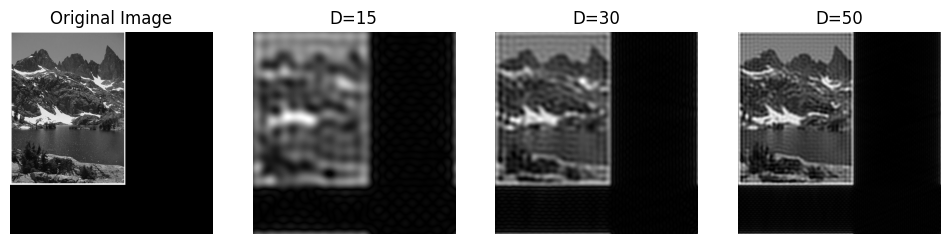

In [59]:
# plot the original image and the other three
plt.figure(figsize=(12,6))

plt.subplot(141)
plt.imshow(lowpassfilter_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(np.abs(lowPassFiltered_1), cmap='gray')
plt.title('D=15')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.abs(lowPassFiltered_2), cmap='gray')
plt.title('D=30')
plt.axis('off')

plt.subplot(144)
plt.imshow(np.abs(lowPassFiltered_3), cmap='gray')
plt.title('D=50')
plt.axis('off')

(-0.5, 290.5, 387.5, -0.5)

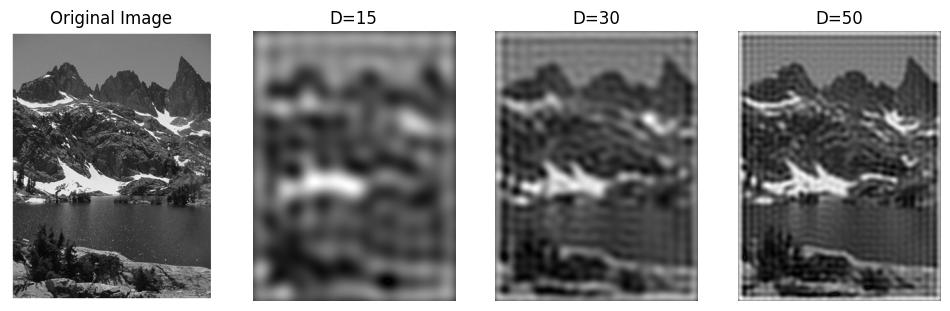

In [60]:
# Crop the image to the original size
lowPassFiltered_cropped = lowpassfilter_image[:original_size[0], :original_size[1]]
lowPassFiltered_1_cropped = lowPassFiltered_1[:original_size[0], :original_size[1]]
lowPassFiltered_2_cropped = lowPassFiltered_2[:original_size[0], :original_size[1]]
lowPassFiltered_3_cropped = lowPassFiltered_3[:original_size[0], :original_size[1]]


plt.figure(figsize=(12,6))

plt.subplot(141)
plt.imshow(lowPassFiltered_cropped, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(np.abs(lowPassFiltered_1_cropped), cmap='gray')
plt.title('D=15')
plt.axis('off')


plt.subplot(143)
plt.imshow(np.abs(lowPassFiltered_2_cropped), cmap='gray')
plt.title('D=30')
plt.axis('off')

plt.subplot(144)
plt.imshow(np.abs(lowPassFiltered_3_cropped), cmap='gray')
plt.title('D=50')
plt.axis('off')



In [61]:
def Gaussian_Low_Pass(img,D):
    h,w=img.shape
    temp=np.copy(img).astype(np.complex128)

    # shifting to the centre
    for i in range(h):
        for j in range(w):
            temp[i][j]*=(-1)**(i+j)

    temp=FFT2(temp)
    mid_h=h/2
    mid_w=w/2

    for i in range(h):
        for j in range(w):
            dist = np.sqrt(((i - mid_h) ** 2 )+ ((j - mid_w) ** 2)) 
            temp[i][j] = np.exp(-(dist**2) / (2 * (D**2))) * temp[i][j]
            
    final_img=IFFT2D(temp)
    return final_img

In [62]:
GausslowPassFiltered_1=Gaussian_Low_Pass(lowpassfilter_image,15)
GausslowPassFiltered_2=Gaussian_Low_Pass(lowpassfilter_image,30)
lGaussowPassFiltered_3=Gaussian_Low_Pass(lowpassfilter_image,50)

KeyboardInterrupt: 

(-0.5, 511.5, 511.5, -0.5)

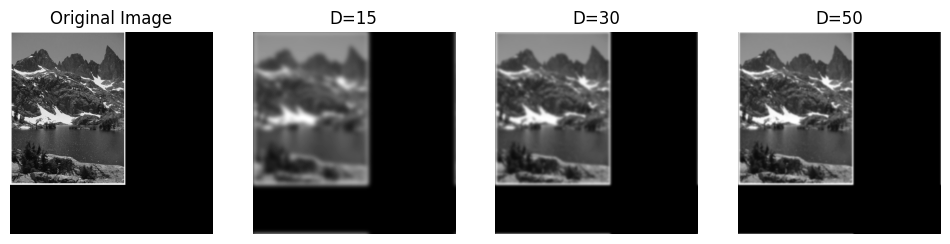

In [ ]:
# plot the original image and the other three
plt.figure(figsize=(12,6))

plt.subplot(141)
plt.imshow(lowpassfilter_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(np.abs(GausslowPassFiltered_1), cmap='gray')
plt.title('D=15')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.abs(GausslowPassFiltered_2), cmap='gray')
plt.title('D=30')
plt.axis('off')

plt.subplot(144)
plt.imshow(np.abs(lGaussowPassFiltered_3), cmap='gray')
plt.title('D=50')
plt.axis('off')

(-0.5, 290.5, 387.5, -0.5)

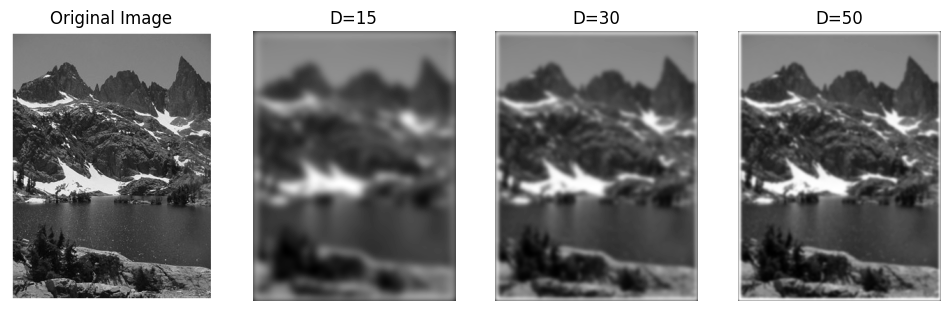

In [ ]:
# Crop the image to the original size
GausslowPassFiltered_cropped = lowpassfilter_image[:original_size[0], :original_size[1]]
GausslowPassFiltered_1_cropped = GausslowPassFiltered_1[:original_size[0], :original_size[1]]
GausslowPassFiltered_2_cropped = GausslowPassFiltered_2[:original_size[0], :original_size[1]]
GausslowPassFiltered_3_cropped = lGaussowPassFiltered_3[:original_size[0], :original_size[1]]


plt.figure(figsize=(12,6))

plt.subplot(141)
plt.imshow(lowPassFiltered_cropped, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(np.abs(GausslowPassFiltered_1_cropped), cmap='gray')
plt.title('D=15')
plt.axis('off')


plt.subplot(143)
plt.imshow(np.abs(GausslowPassFiltered_2_cropped), cmap='gray')
plt.title('D=30')
plt.axis('off')

plt.subplot(144)
plt.imshow(np.abs(GausslowPassFiltered_3_cropped), cmap='gray')
plt.title('D=50')
plt.axis('off')



In [ ]:
def conv2D(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    output = np.zeros_like(img)

    # Perform convolution with zero padding
    for i in range(img_height):
        for j in range(img_width):
            roi = img[max(0, i - pad_height):min(img_height-1, i + pad_height + 1),
                      max(0, j - pad_width):min(img_width-1, j + pad_width + 1)]

            if roi.shape == kernel.shape:
                output[i, j] = np.sum(roi * kernel)
    
    # clip the output
    output = np.clip(output, 0, 255)

    return output

In [ ]:
def generate_gaussian_kernel(sigma, size):
    kernel = np.fromfunction(
        lambda x, y: 
                     np.exp(-(((x - ((size-1)/2))**2) + ((y - ((size-1)/2))**2)) / (2 * (sigma ** 2))),
        (size, size)
    )
    return kernel / np.sum(kernel)  


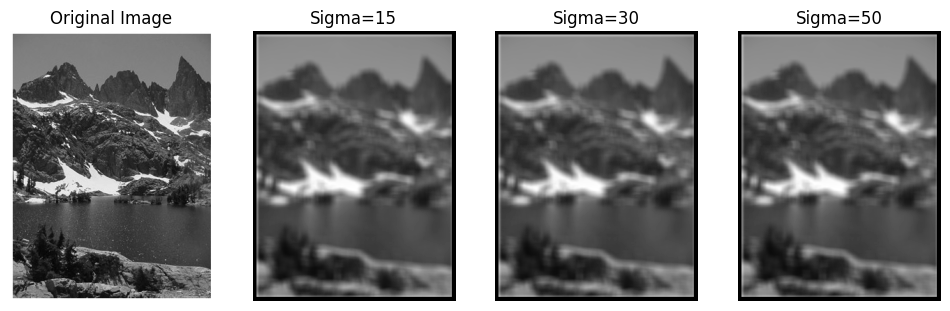

In [ ]:
# Load the image
lowpassfilter_image = cv2.imread("./lakeside.jpg", cv2.IMREAD_GRAYSCALE)

# Plot the original image
plt.figure(figsize=(12, 6))
plt.subplot(141)
plt.imshow(lowpassfilter_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Parameters
k = 11
sigma_values = [15, 30, 50]

# Iterate over all sigmas
for i in range(len(sigma_values)):
    sigma = sigma_values[i]

    # Generate Gaussian kernel
    gaussian_kernel = generate_gaussian_kernel(sigma, k)

    # Convolve with image
    gaussian_filtered_image = conv2D(lowpassfilter_image, gaussian_kernel)

    # Plot the filtered image
    plt.subplot(142 + i)
    plt.imshow(gaussian_filtered_image, cmap='gray')
    plt.title(f'Sigma={sigma}')
    plt.axis('off')

plt.show()

here when we increase the value of d0 the the image becomes more clearer this i gusssian low pass this is because we aloow more frequency to be there aloowed.
but when we use gaussian smoothinh as signma increae then bklur inceae and image becoms more bluuere

In the case of Gaussian low-pass filtering, the parameter D plays a pivotal role. As we increment the value of D , we notice a significant improvement in image clarity. This phenomenon occurs because a higher allows a broader range of frequencies to be retained, effectively preserving more details in the image. The result is a clearer and sharper visual representation.

Conversely, when employing Gaussian smoothing and adjusting the parameter σ, we encounter a different trend. As σ increases, the image tends to become more blurred. This blurring effect arises due to the broader spatial extent of the smoothing filter. A larger σ leads to a wider convolution kernel, causing neighboring pixel values to contribute more to each pixel in the output. Consequently, the image appears smoother but may lose fine details.

### Q3 : Remove pattern that is obstructing view of image

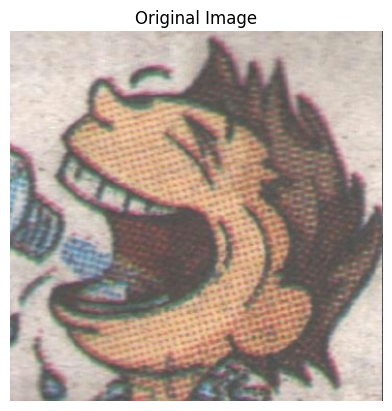

In [63]:
img=cv2.imread("./cart.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')
plt.show()

In [64]:
channels=[0,0,0]
channels[0]=pad2D_array(img[:,:,0])
channels[1]=pad2D_array(img[:,:,1])
channels[2]=pad2D_array(img[:,:,2])



In [65]:
def idealNotch(img, distance_center_1, width_1):
    height, width = img.shape
    temp = np.copy(img).astype(np.complex128)

    # Apply (-1)^(i+j) to each element in the image
    for i in range(height):
        for j in range(width):
            temp[i][j] *= (-1) ** (i + j)

    fft_img = FFT2(temp)
    mid_height = height / 2
    mid_width = width / 2
    notch_pass_img = np.copy(fft_img)

    for i in range(height):
        for j in range(width):
            d = np.sqrt((i - mid_height) ** 2 + (j - mid_width) ** 2)
            condition_1 = (d >= distance_center_1 - width_1 / 2 and d <= distance_center_1 + width_1 / 2)
            condition_3 = (np.abs(i - mid_height) > 15 and np.abs(j - mid_width) > 15)

            if (condition_1) and condition_3:
                notch_pass_img[i][j] = 0
            else:
                notch_pass_img[i][j] = fft_img[i][j]

    return notch_pass_img


In [66]:
final_imgs = [0, 0, 0]
for i in range(3):
    fft_img = FFT2(channels[i])
    notchFiltered = idealNotch(channels[i], 75, 5)
    final_imgs[i] = np.abs(IFFT2D(notchFiltered)).astype(np.uint8)


(-0.5, 511.5, 511.5, -0.5)

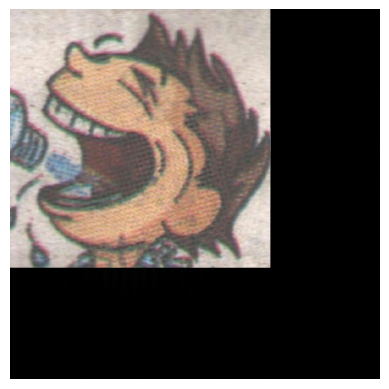

In [67]:
final_image=cv2.merge((final_imgs[0],final_imgs[1],final_imgs[2]))
plt.imshow(final_image)
plt.axis('off')